In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load CSV (change filename if needed)
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 2 - Overview
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nMissing values (original):")
print(df.isnull().sum())


Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing values (original):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Impute Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
# Treat empty strings as NaN then impute Embarked with mode
df["Embarked"].replace('', np.nan, inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
print("Missing values AFTER imputation (Age & Embarked):")
print(df.isnull().sum())


Missing values AFTER imputation (Age & Embarked):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-242776051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-242776051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
from sklearn.preprocessing import StandardScaler
print("Fare - BEFORE scaling (first 8 rows):")
print(df["Fare"].head(8))

# If Fare has NaNs, fill with median so scaler won't fail
if df["Fare"].isnull().any():
    print("Found missing Fare values - filling with median before scaling.")
    df["Fare"].fillna(df["Fare"].median(), inplace=True)

scaler = StandardScaler()

# fit_transform expects a 2D array -> we keep original Fare and add Fare_scaled column
df["Fare_scaled"] = scaler.fit_transform(df[["Fare"]])[:, 0]

print("\nFare_scaled - AFTER scaling (first 8 rows):")
print(df[["Fare", "Fare_scaled"]].head(8))

Fare - BEFORE scaling (first 8 rows):
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
Name: Fare, dtype: float64

Fare_scaled - AFTER scaling (first 8 rows):
      Fare  Fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337
5   8.4583    -0.478116
6  51.8625     0.395814
7  21.0750    -0.224083


In [ ]:
print("Columns BEFORE one-hot encoding:")
print(list(df.columns))
print("\nSex and Embarked (before encoding) - first 8 rows:")
print(df[["Sex", "Embarked"]].head(8))



Columns BEFORE one-hot encoding:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_scaled']

Sex and Embarked (before encoding) - first 8 rows:
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S
5    male        Q
6    male        S
7    male        S


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
# Fit & transform
encoded_arr = ohe.fit_transform(df[["Sex", "Embarked"]])
# Column names from encoder
encoded_cols = ohe.get_feature_names_out(["Sex", "Embarked"])
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_arr, columns=encoded_cols, index=df.index)
# Show encoded columns only
print("Encoded columns (first 8 rows):")
print(encoded_df.head(8))

Encoded columns (first 8 rows):
   Sex_male  Embarked_Q  Embarked_S
0       1.0         0.0         1.0
1       0.0         0.0         0.0
2       0.0         0.0         1.0
3       0.0         0.0         1.0
4       1.0         0.0         1.0
5       1.0         1.0         0.0
6       1.0         0.0         1.0
7       1.0         0.0         1.0


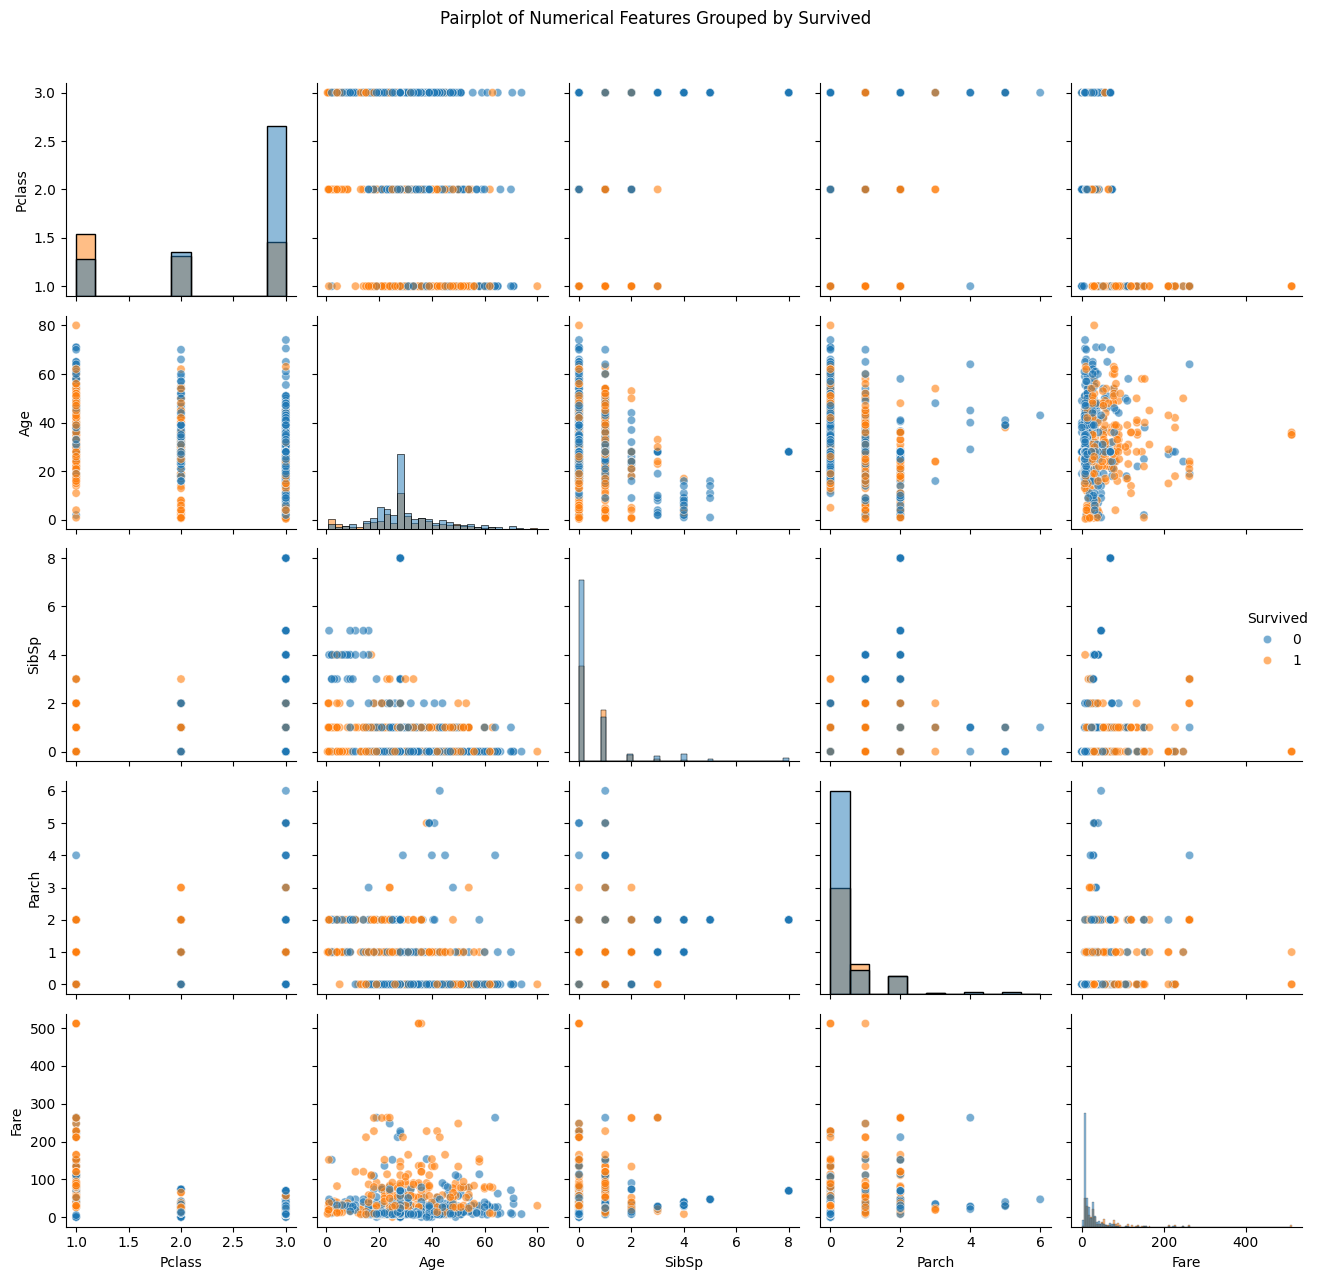

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for plotting
num_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

# Make sure 'Survived' is integer type
df["Survived"] = df["Survived"].astype(int)

# Create the pairplot grouped by 'Survived'
sns.pairplot(
    df[num_features + ["Survived"]],
    hue="Survived",
    diag_kind="hist",
    plot_kws={"alpha": 0.6}
)

# Add a title to the whole figure
plt.suptitle("Pairplot of Numerical Features Grouped by Survived", y=1.02)
plt.tight_layout()
plt.show()